# Import libraries

In [1]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import utils
import config
import re
import os

In [2]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Metadata

In [3]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,bos_taurus_read_count
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,37
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,30
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,13268
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,3304
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2761
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2339
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,1853


In [4]:
metadata["timepoint"] = metadata["Timeline_Weeks"]

has_time_info = ~metadata["Timeline_Weeks"].isna() & (metadata["Timeline_Weeks"] != "na")
metadata = metadata.loc[has_time_info]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,bos_taurus_read_count,timepoint
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,37,0
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,30,1
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,13268,0
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,3304,0
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,476,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2761,96
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2339,96
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,1853,96


In [5]:
metadata.index = metadata["Patient_No"]
metadata["timepoint_plot"] = [int(time) for time in metadata["timepoint"]]
# metadata["timepoint_plot"] = metadata["timepoint_plot"].apply(lambda x : {0 : 0, 1 : 1, 2 : 2, 3 : 3, 4 : 4, 
#     12: 5, 24 : 6, 36 : 7, 48 : 8, 60 : 9, 72 : 10, 84 : 11, 96 : 12}[x])
metadata

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,bos_taurus_read_count,timepoint,timepoint_plot
Patient_No,,,,,,,,,,,,,,,,,,,,,
101,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,37,0,0
101,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,30,1,1
104,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,13268,0,0
105,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,3304,0,0
105,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,476,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2761,96,96
595,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2339,96,96
585,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,1853,96,96


In [7]:
metadata["Bos taurus relative abundance"] = metadata["bos_taurus_read_count"] / metadata["depth"]
metadata["Bos taurus relative abundance (log trans)"] = np.log10(metadata["Bos taurus relative abundance"] + 0.00001)
metadata

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,bos_taurus_read_count,timepoint,timepoint_plot,Bos taurus relative abundance,Bos taurus relative abundance (log trans)
Patient_No,,,,,,,,,,,,,,,,,,,,,
101,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,37,0,0,0.000024,-4.469140
101,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,30,1,1,0.000026,-4.447258
104,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,13268,0,0,0.007711,-2.112321
105,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,3304,0,0,0.000484,-3.306184
105,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,476,0,0,0.000163,-3.763045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2761,96,96,0.001767,-2.750432
595,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2339,96,96,0.001106,-2.952143
585,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,1853,96,96,0.001123,-2.945860


In [8]:
timepoints_sorted = np.unique(metadata["Timeline_Weeks"])
timepoints_sorted = sorted(timepoints_sorted, key=lambda x : int(x))

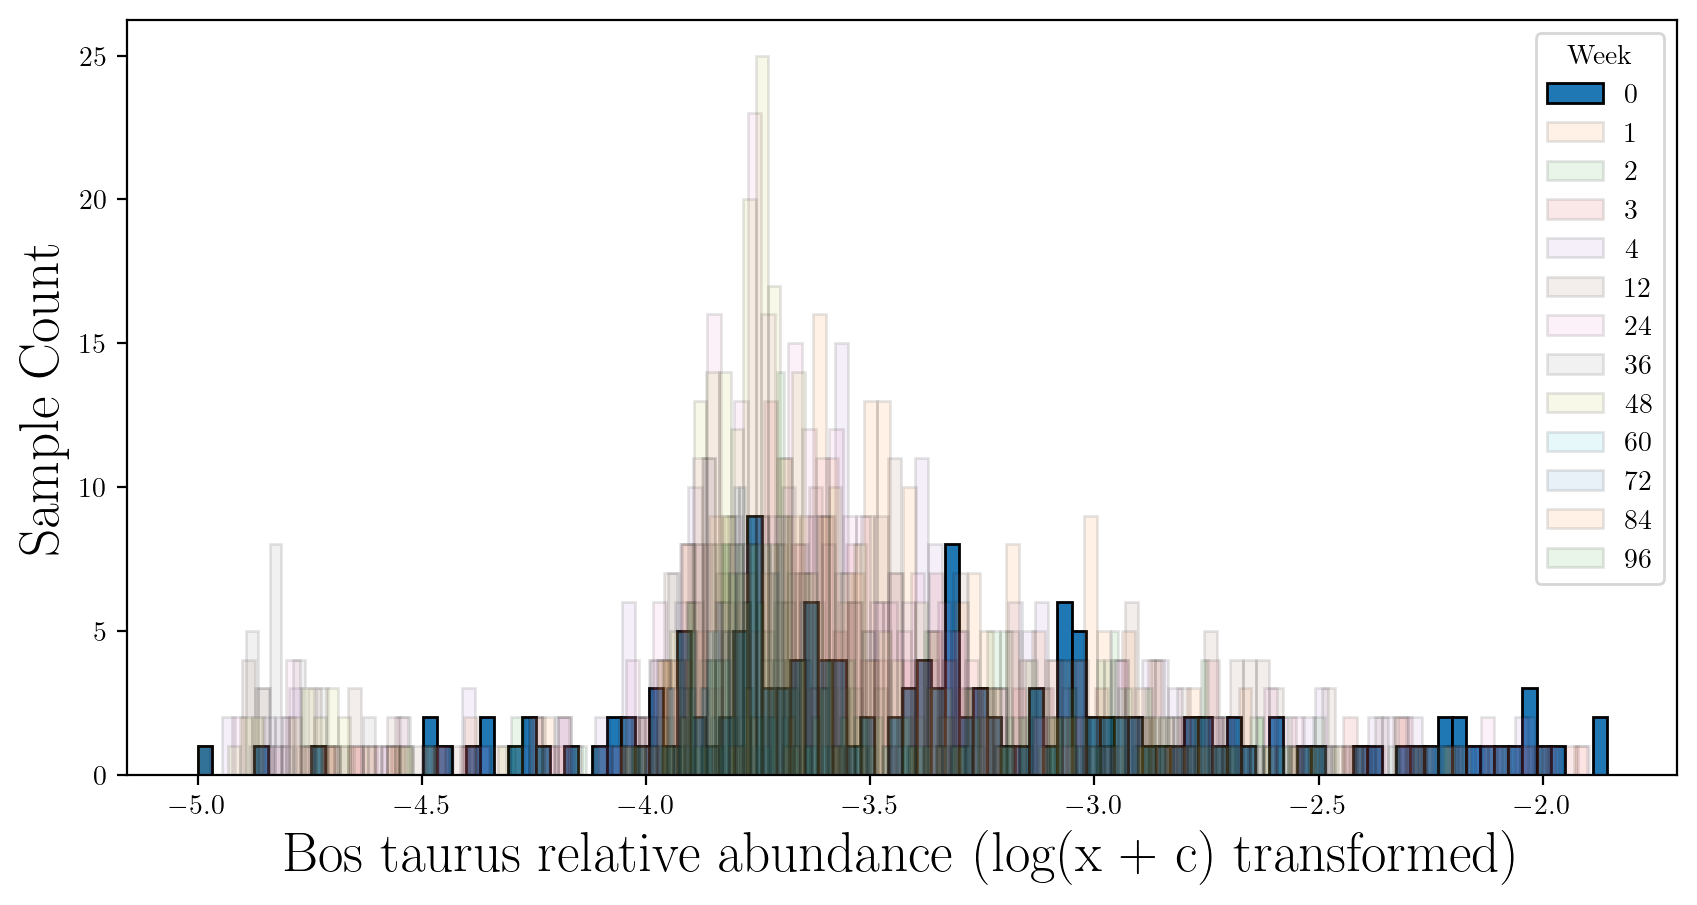

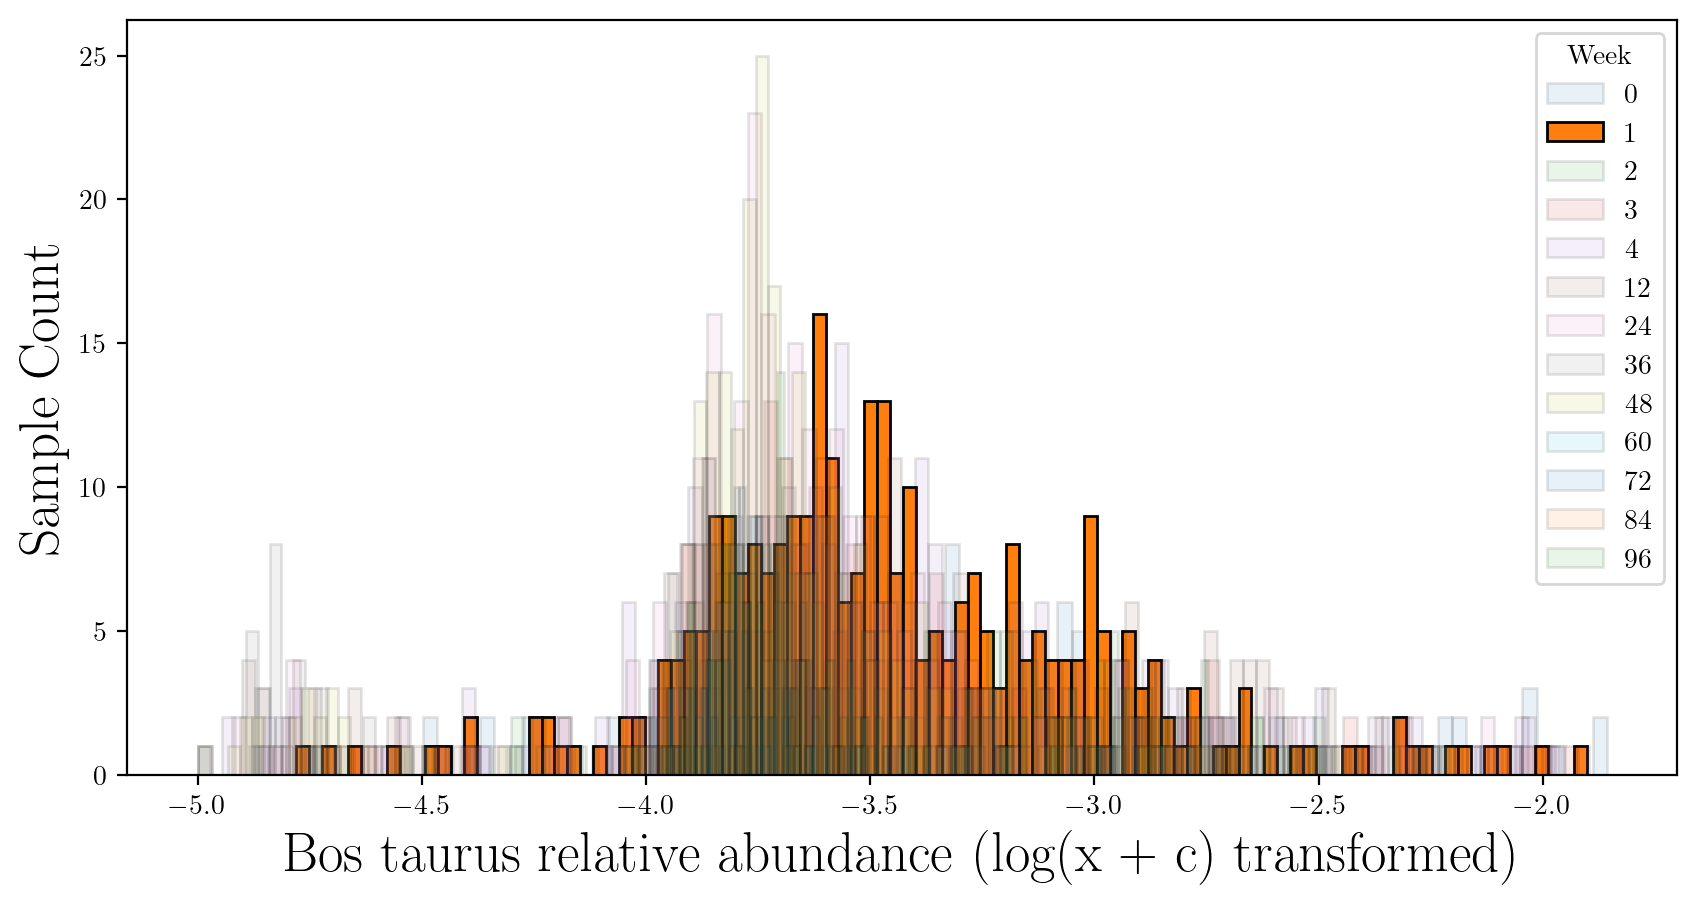

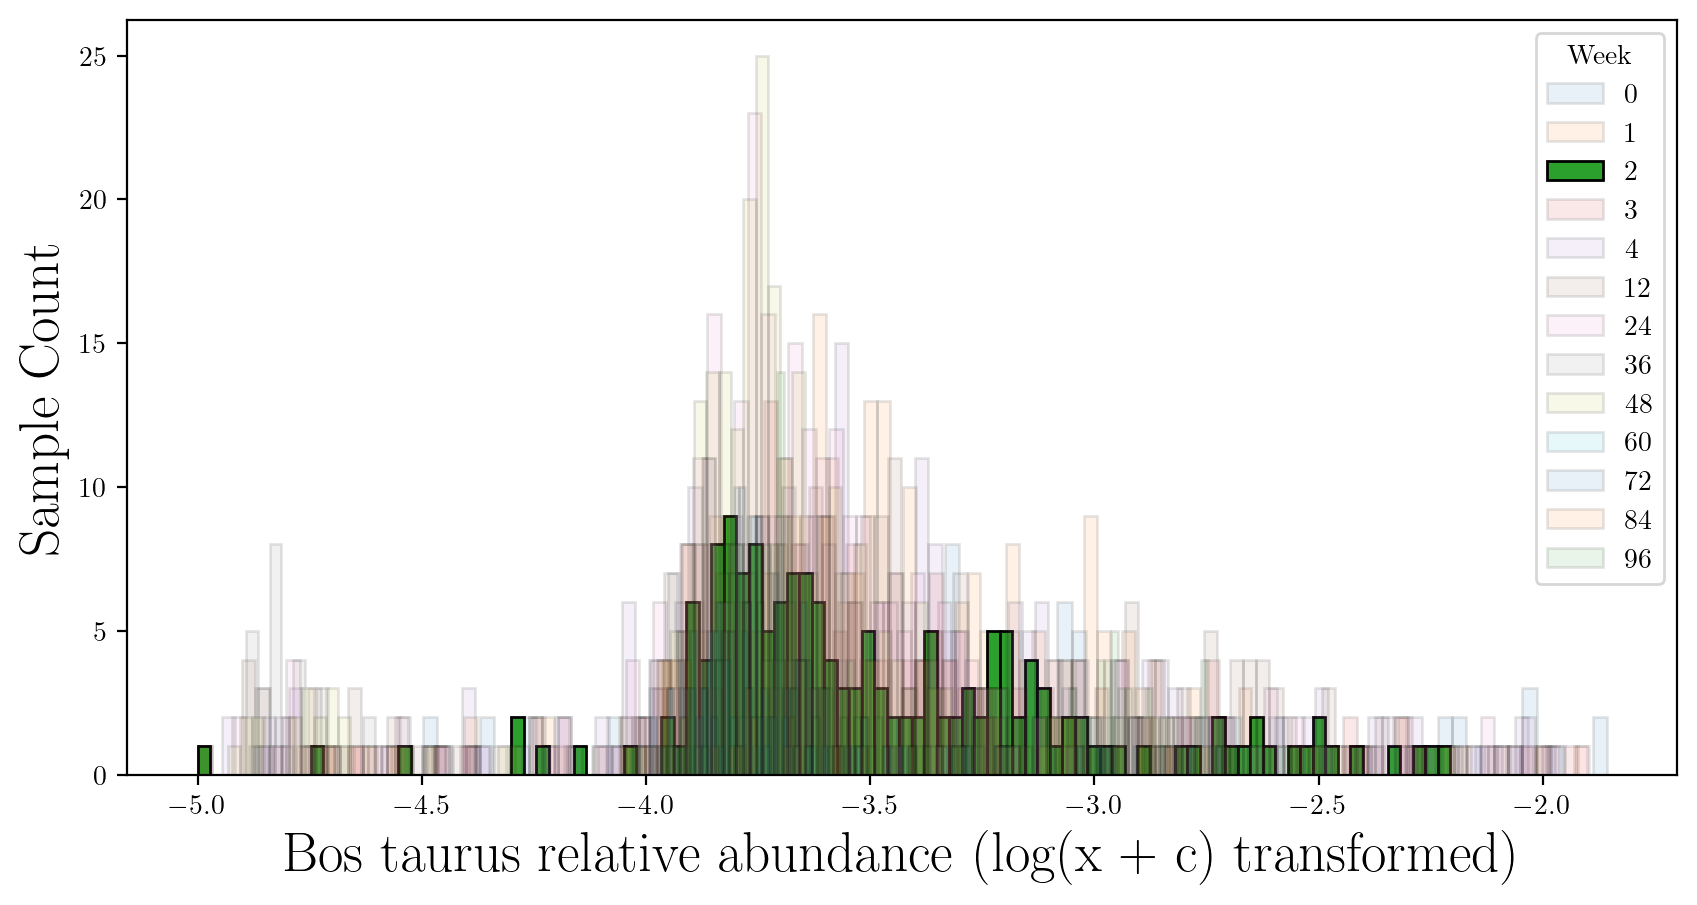

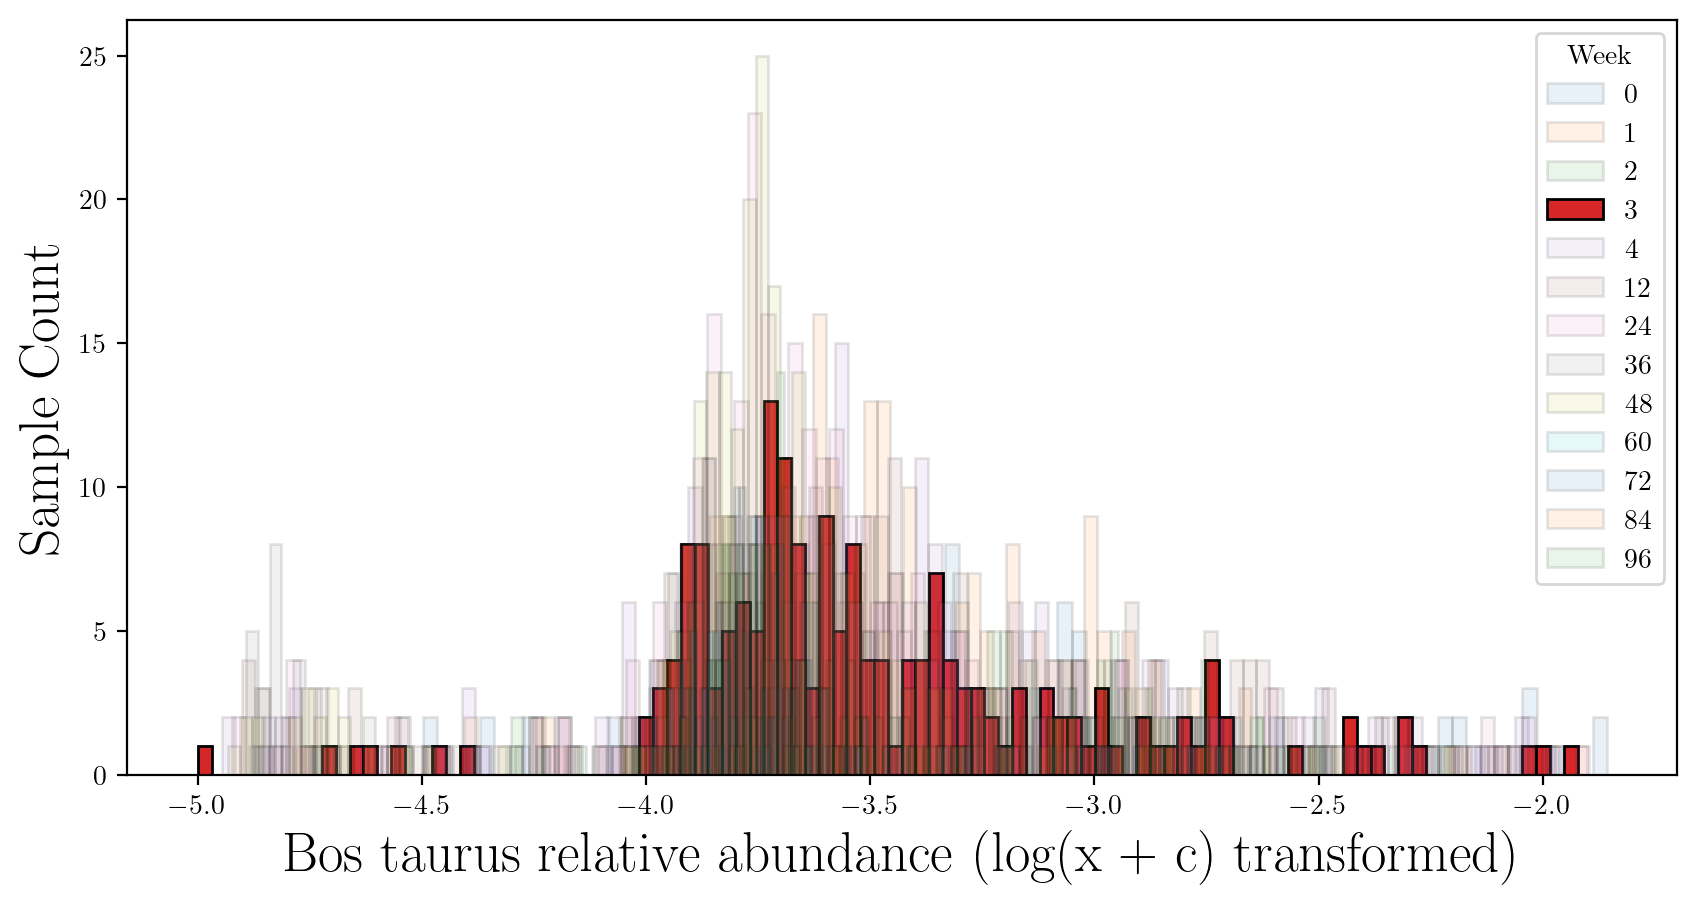

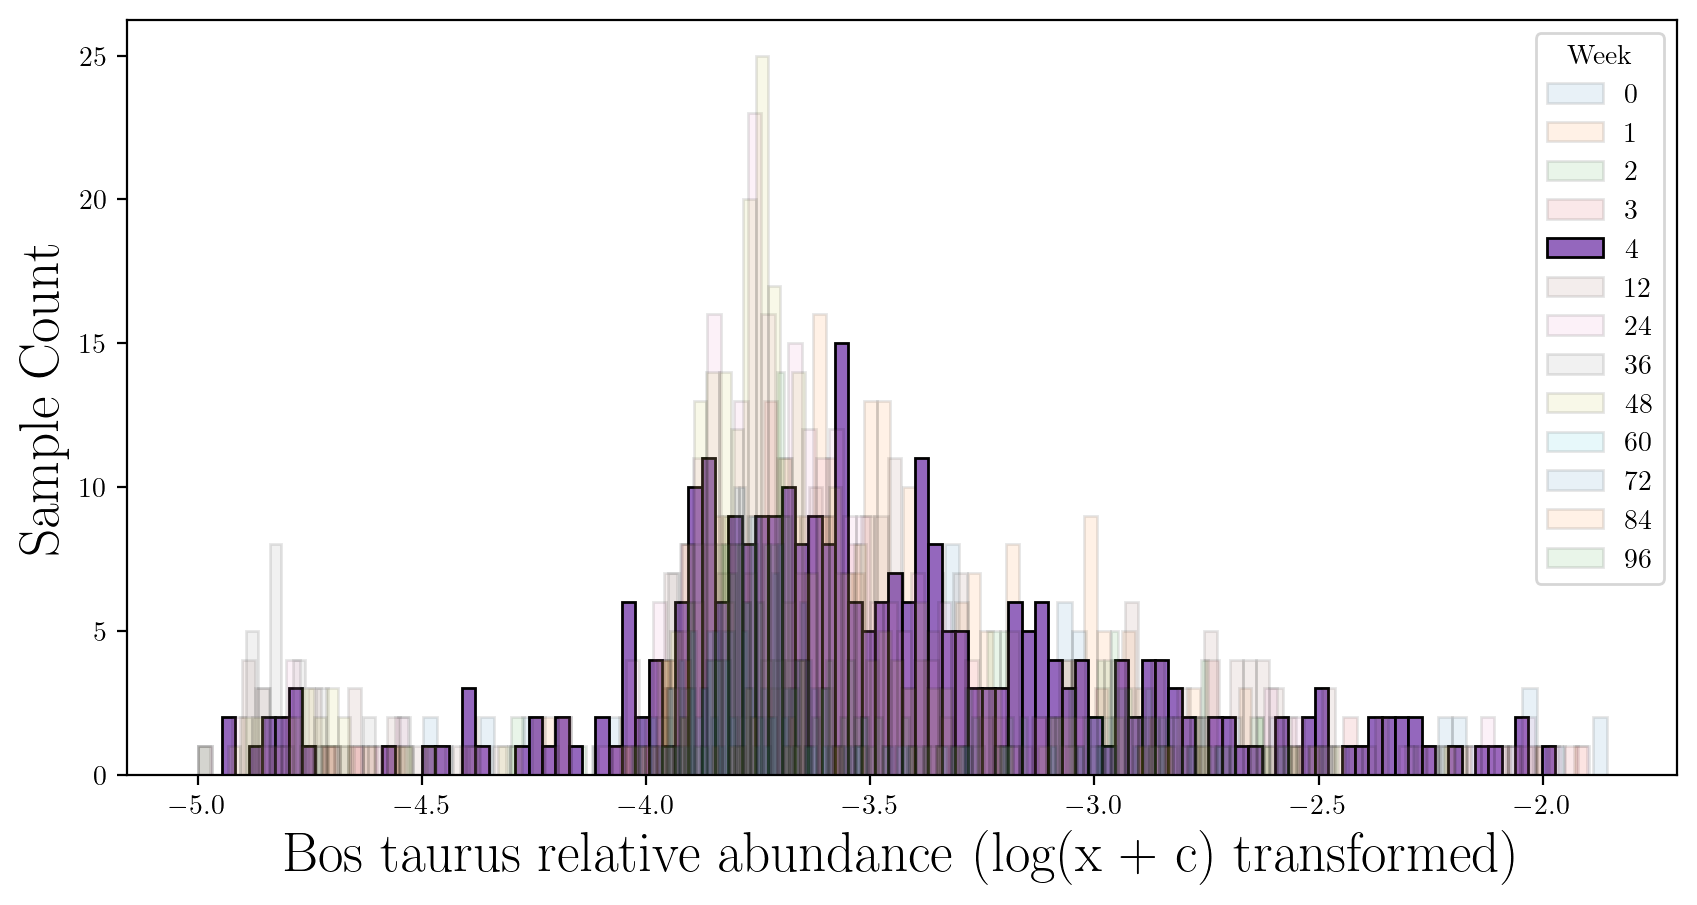

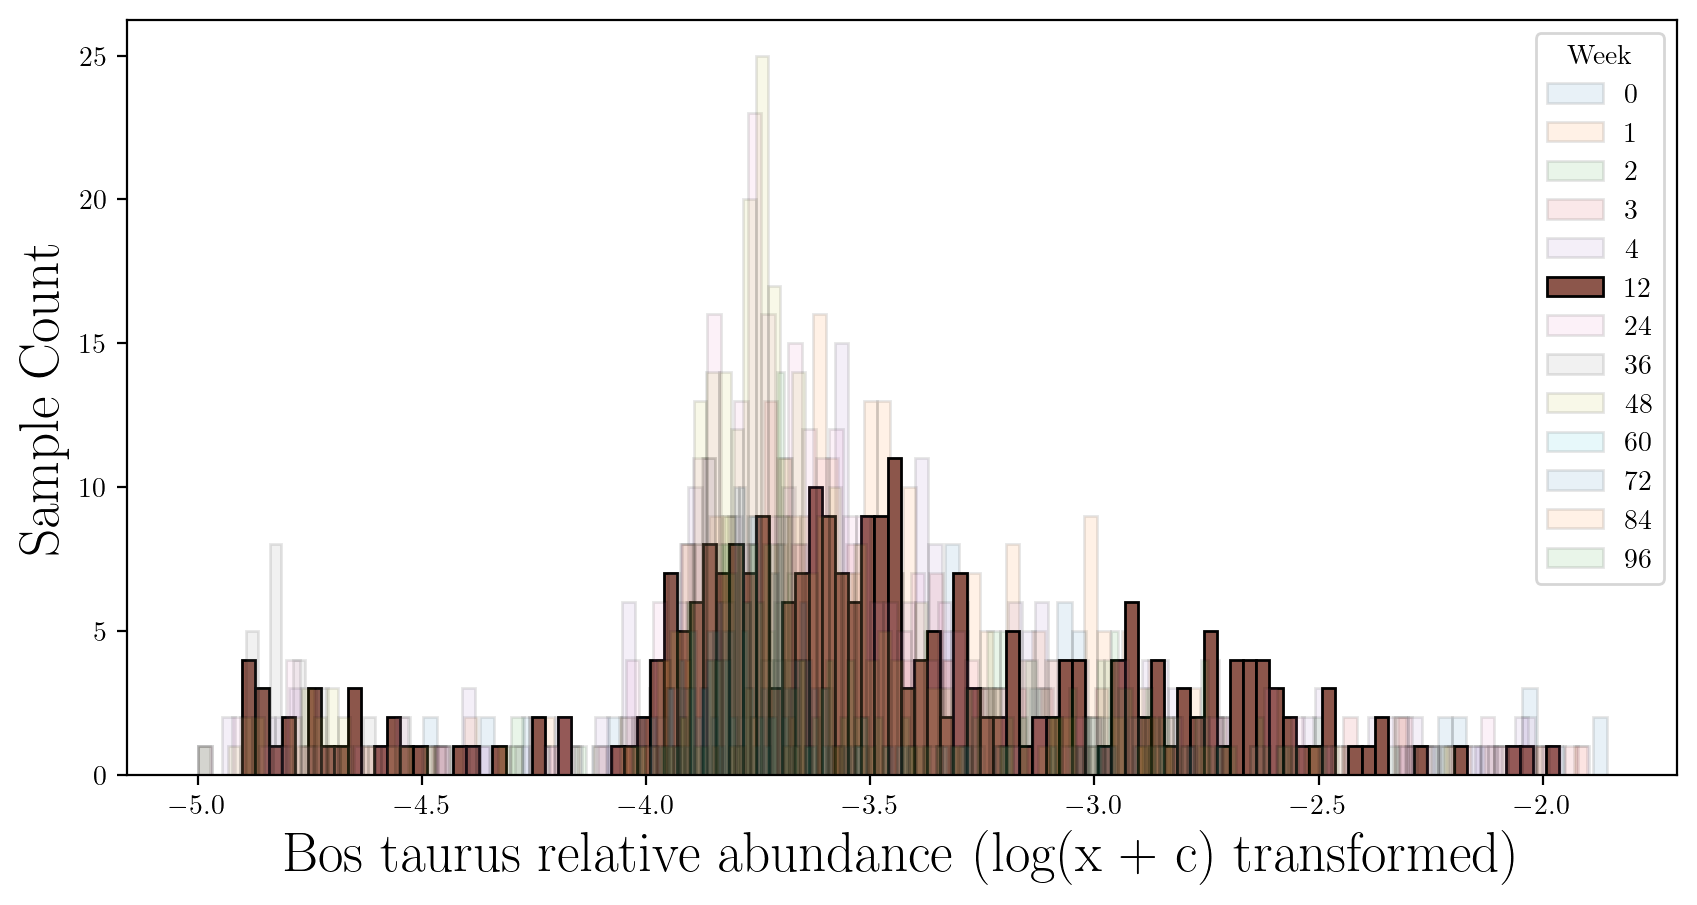

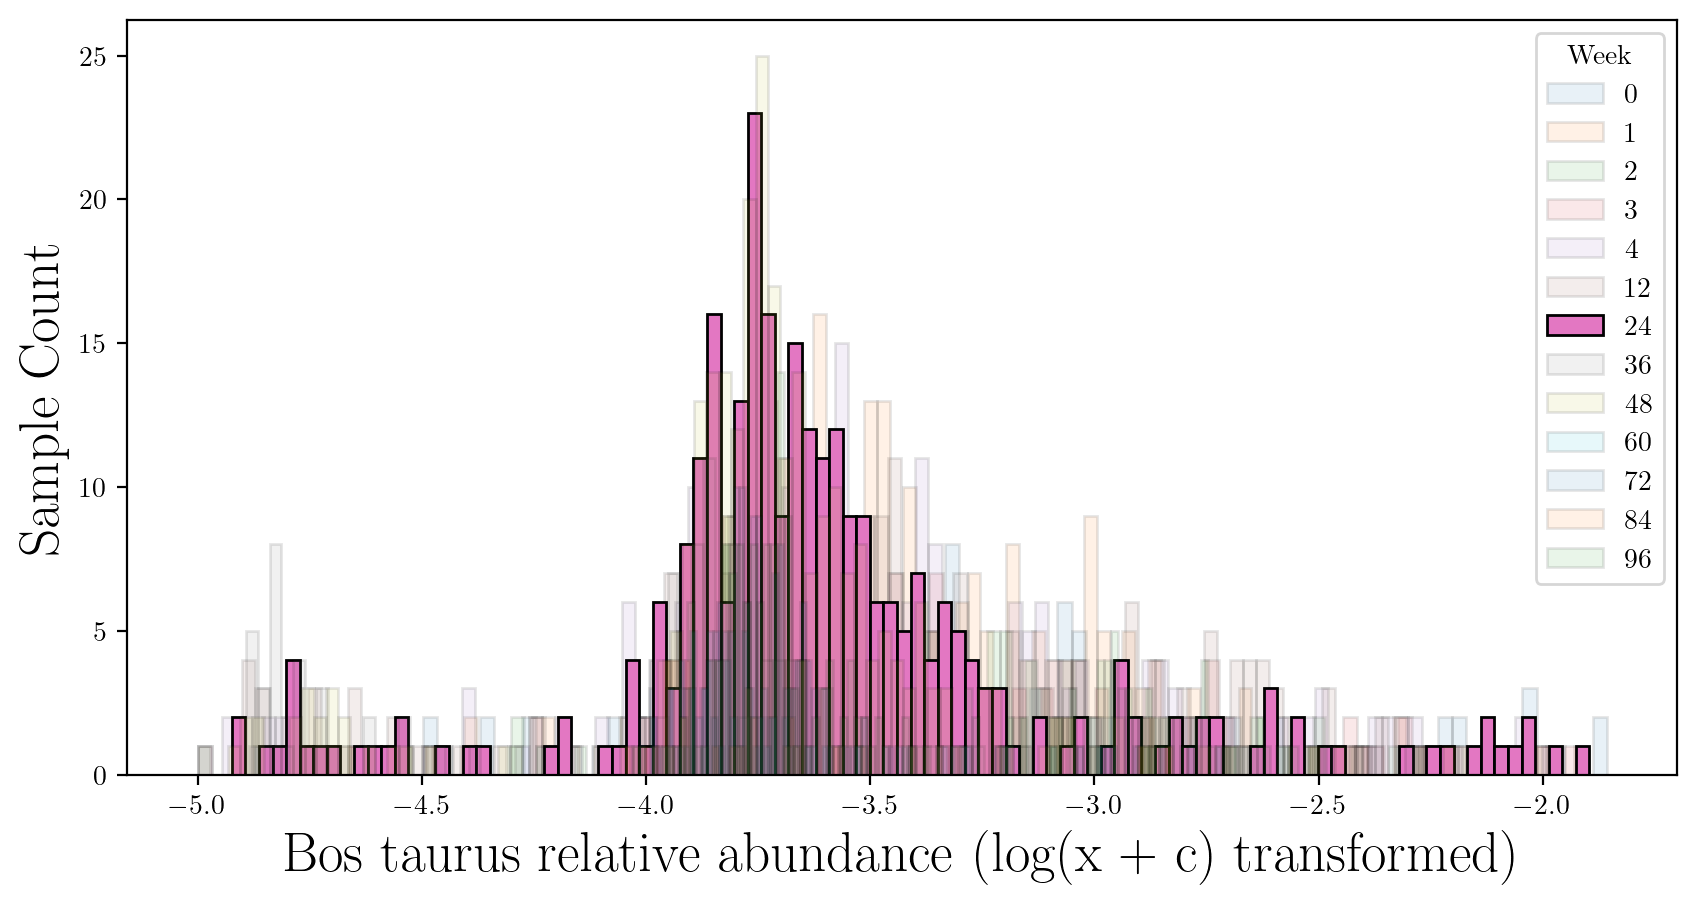

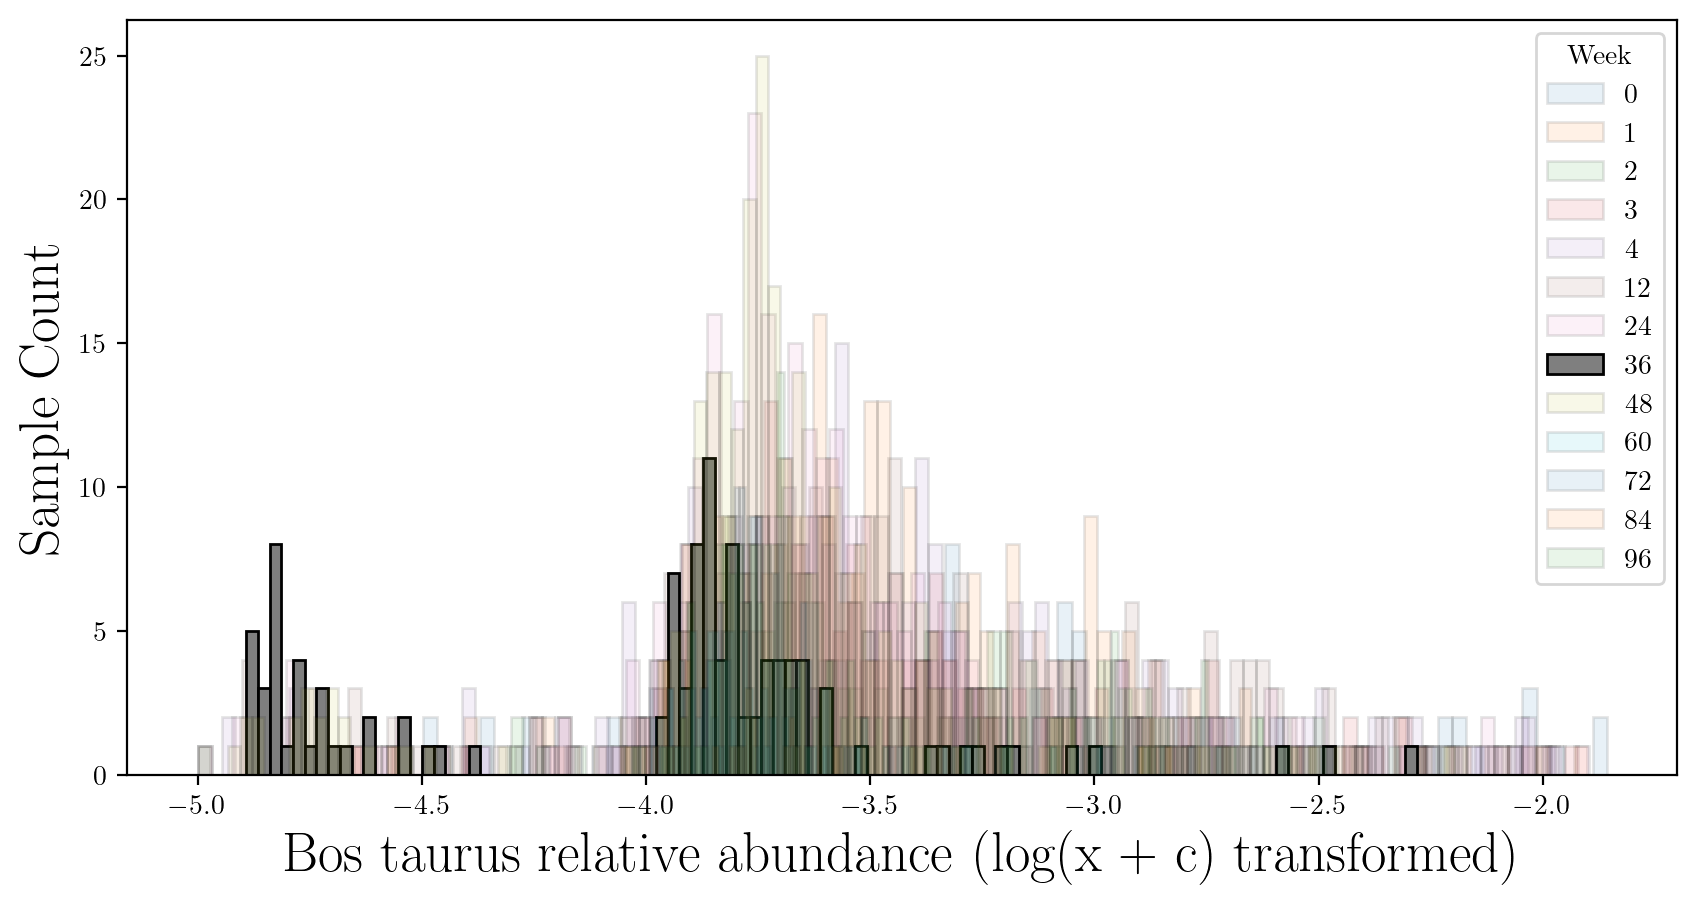

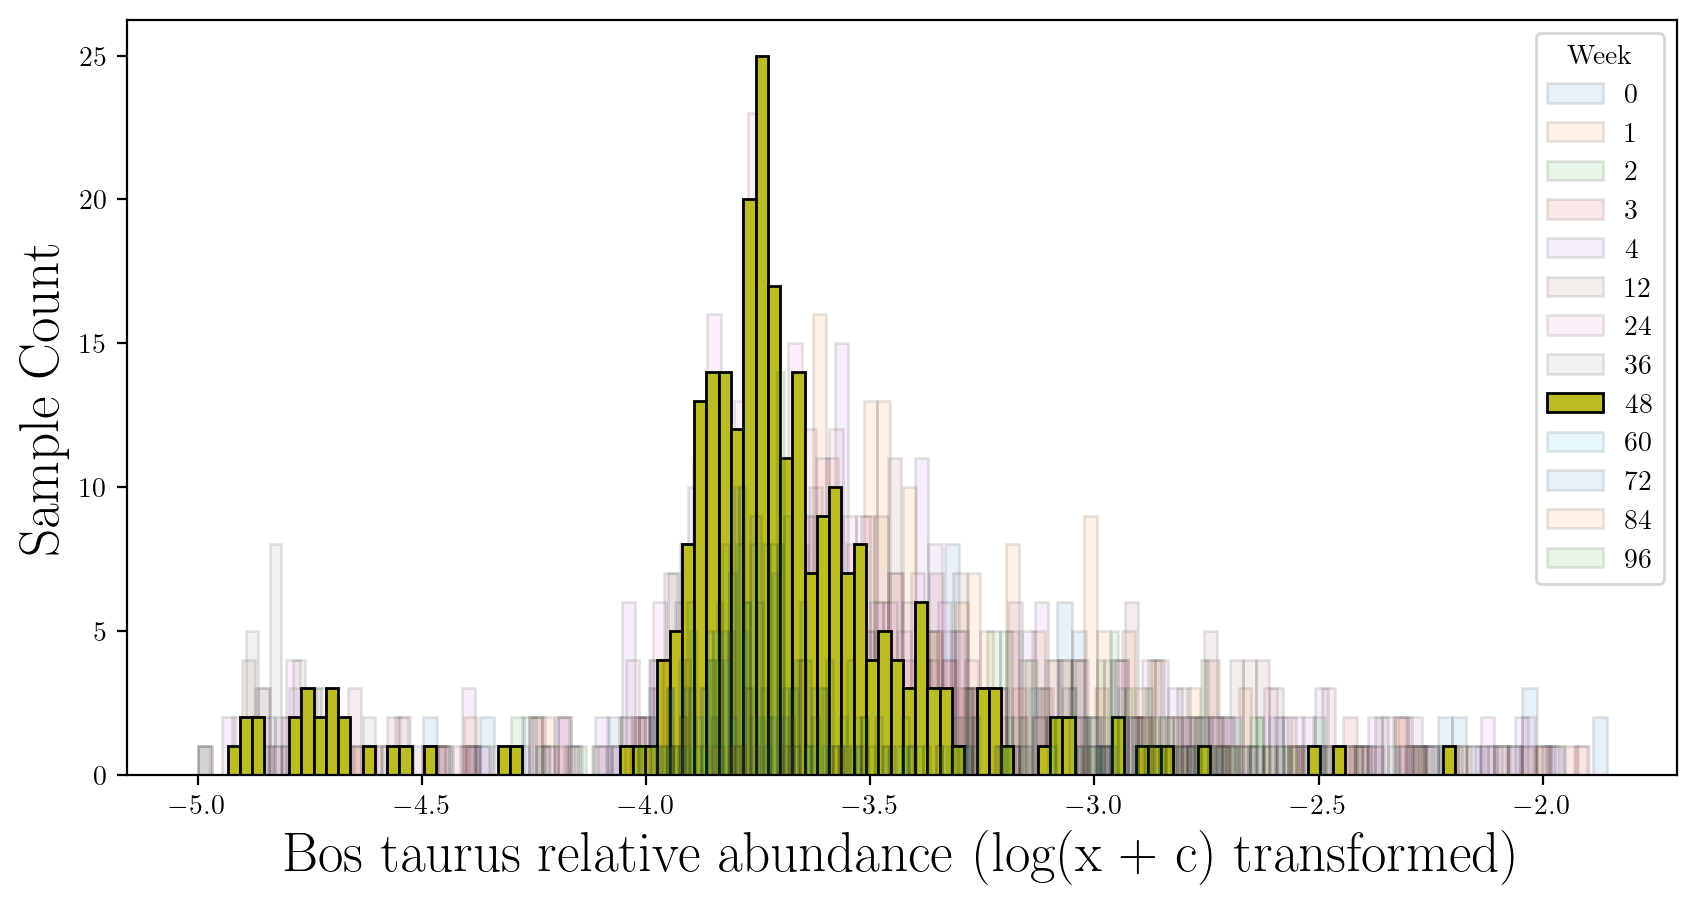

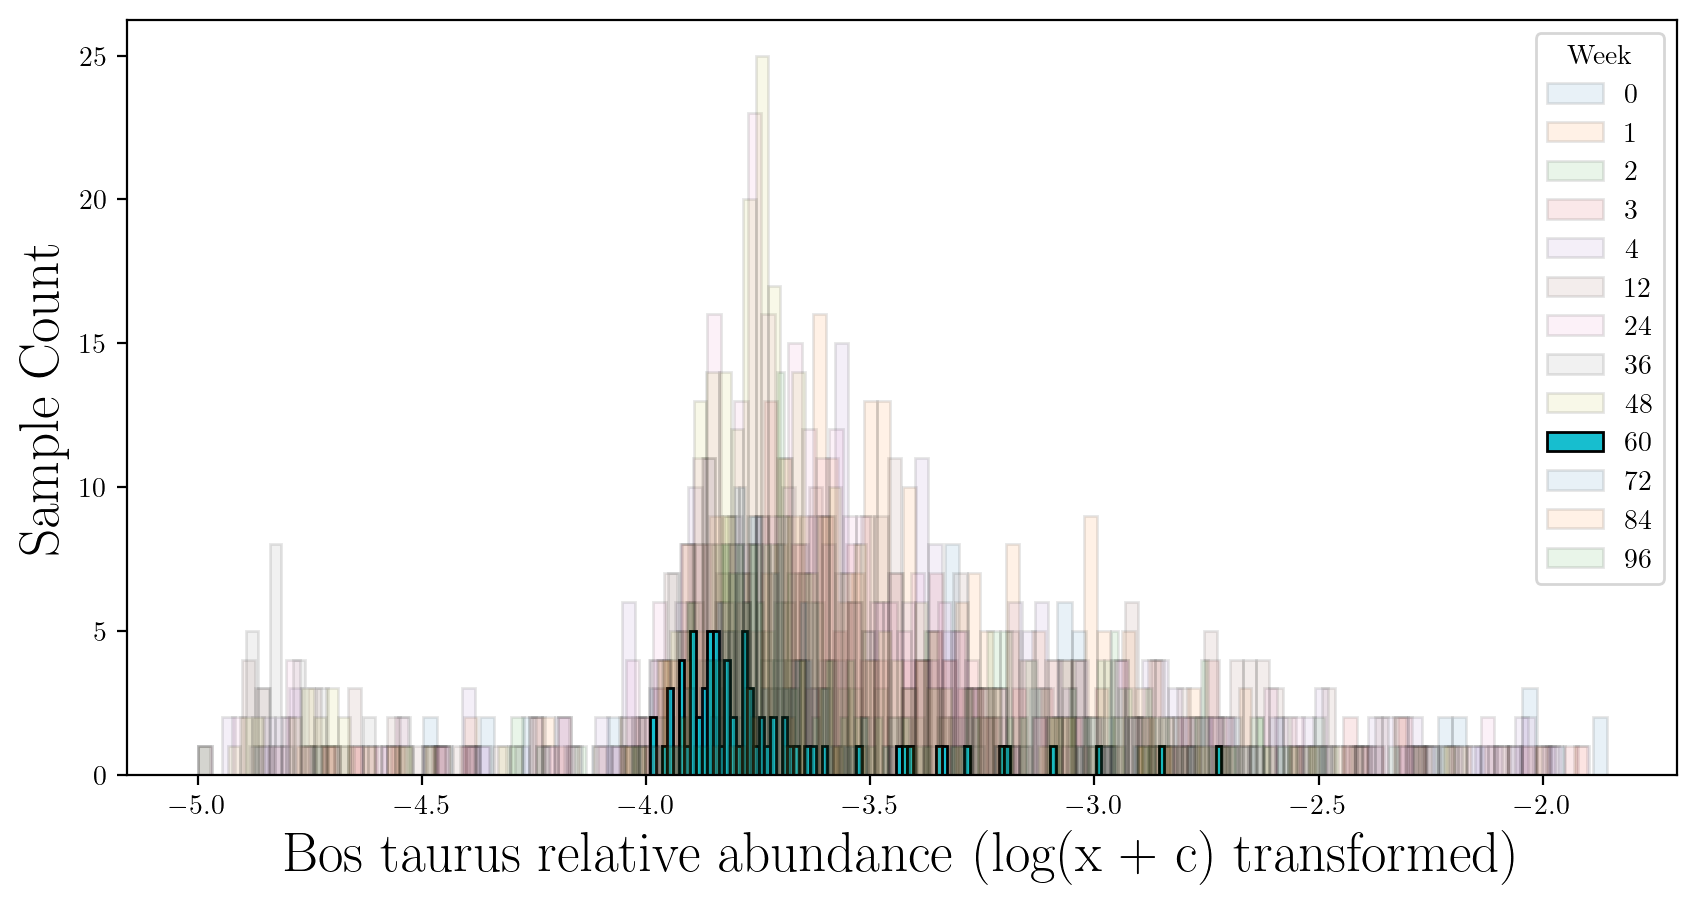

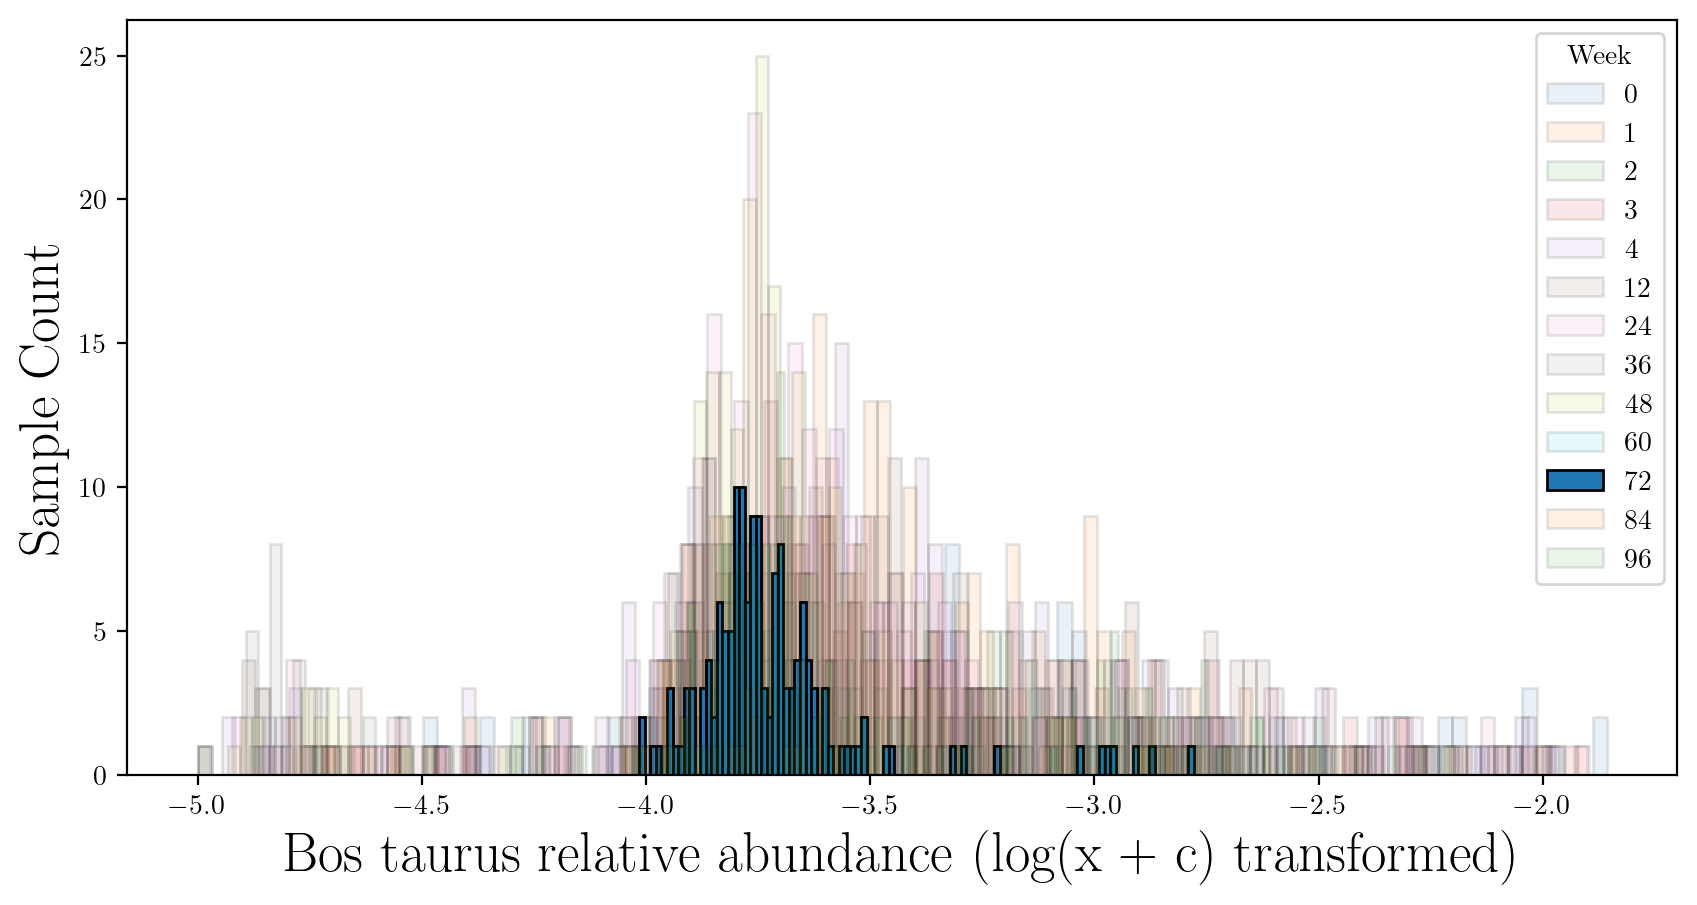

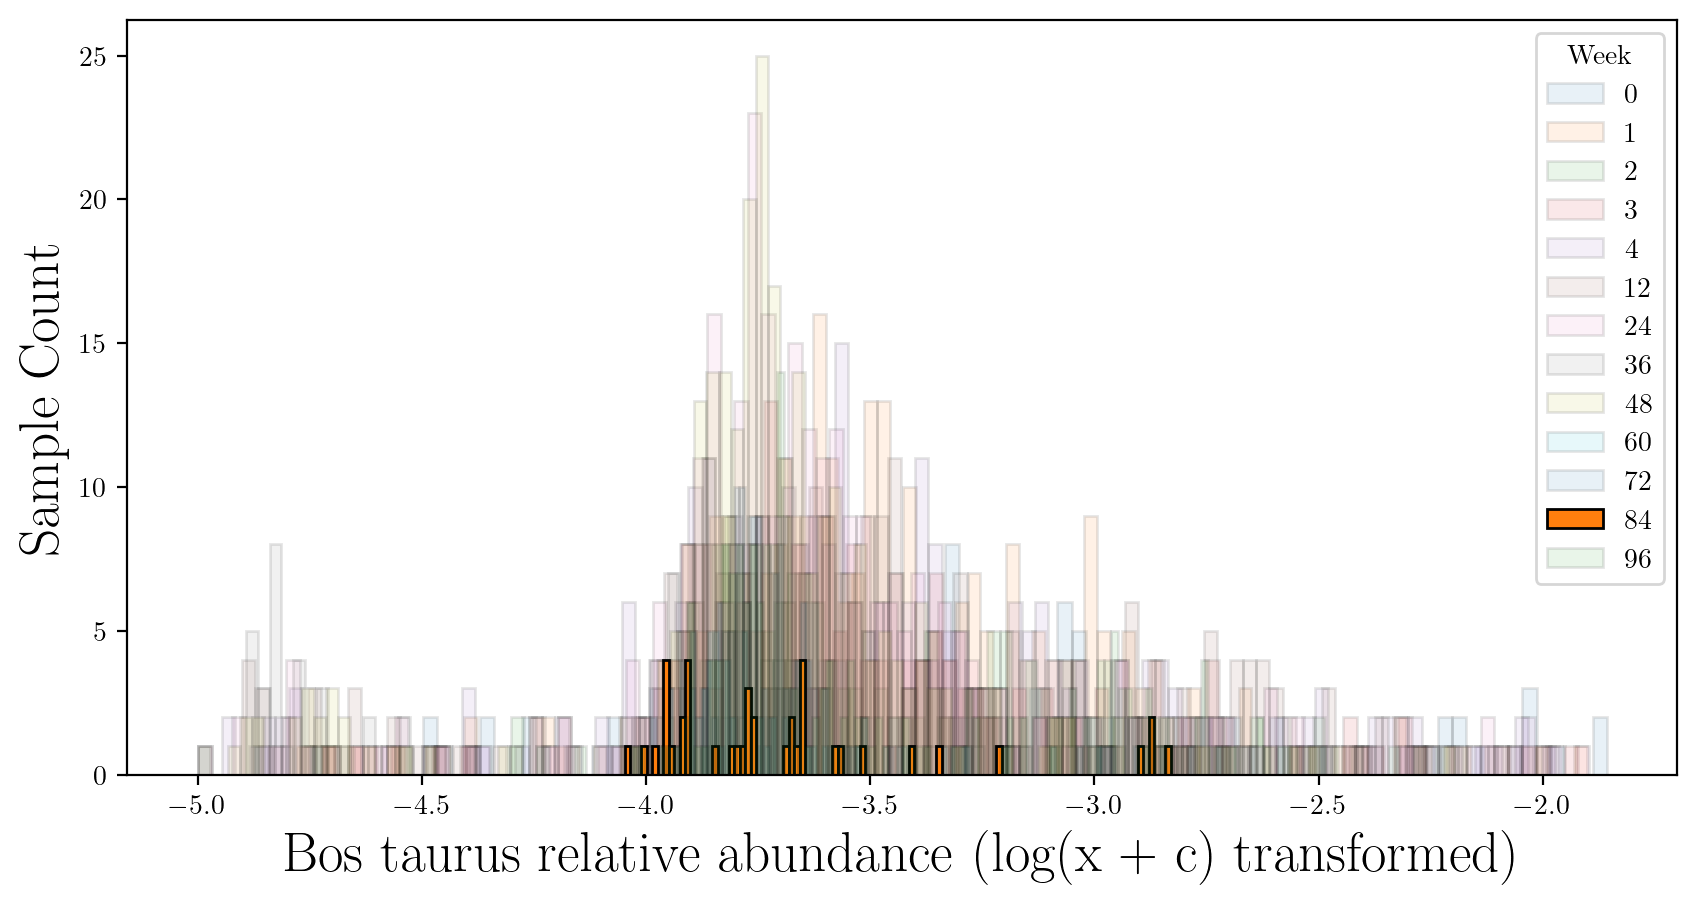

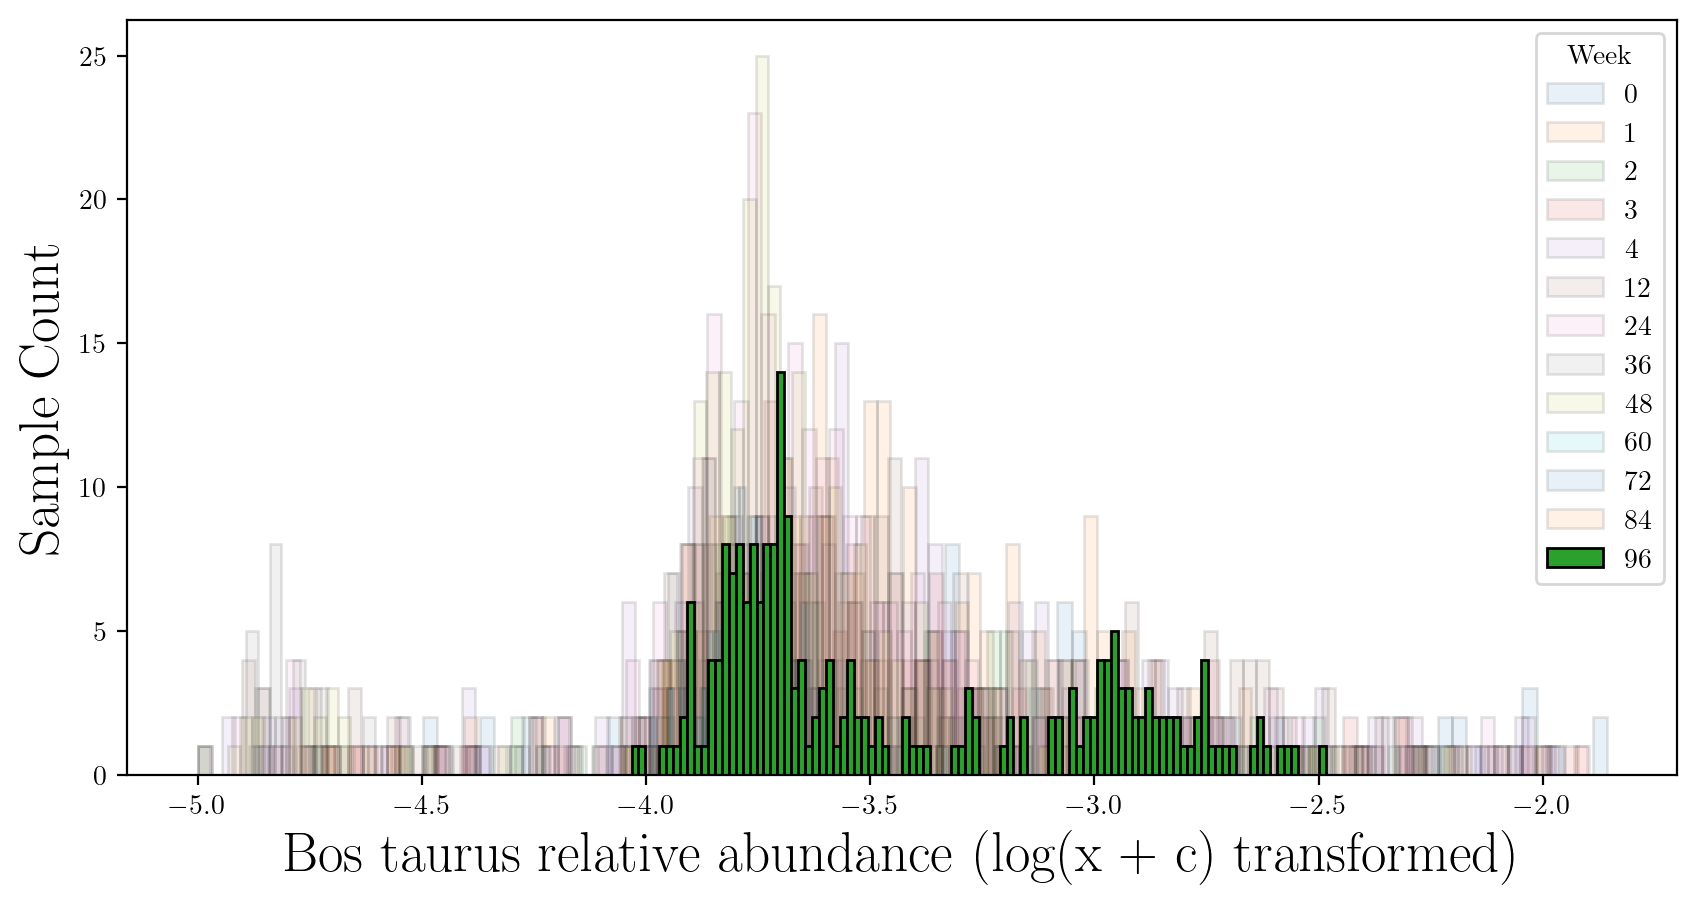

In [15]:
for bold_week in timepoints_sorted: 
    plt.figure(figsize=(10, 5), dpi=200, facecolor="white")
    for week in timepoints_sorted:
        df = metadata[metadata["Timeline_Weeks"] == week]

        alpha = 1 if week == bold_week else 0.1
        df["Bos taurus relative abundance (log trans)"].plot.hist(bins=100, label=week, alpha=alpha, edgecolor="black")

        plt.ylabel("Sample Count", fontsize=20)
        plt.xlabel("Bos taurus relative abundance (log(x + c) transformed)", fontsize=20)

    plt.legend(title="Week")
    plt.savefig(os.path.join(config.FIGURE_DIR, f"bos_taurus_week_{bold_week}.png"))
    plt.show()

In [13]:
def plot_index(index):
    fig = plt.figure(figsize=(16, 4), dpi=200)
    ax = plt.gca()

    plotted_longitudinal = []

    subjects = np.unique(metadata.index)
    for subject in subjects:
        df = metadata.loc[[subject]].copy()
        df = df.sort_values("timepoint_plot")
        df = df.drop_duplicates("Timeline_Weeks")
        plotted_longitudinal.append(df)
        ax.plot(df["timepoint_plot"], df[index], c="gray", zorder=0, alpha=0.2)
    ax.set_xticks([int(t) for t in timepoints_sorted])
    ax.set_xticklabels(timepoints_sorted)
    ax.set_ylabel(index, fontsize=18)
    ax.set_xlabel("Time point (weeks)", fontsize=18)

    plotted_df = pd.concat(plotted_longitudinal)

    for i, time in enumerate(timepoints_sorted):
        data = plotted_df[plotted_df["timepoint"] == time][index]
        sc = ax.scatter(np.ones(data.shape[0]) * int(time), data, s=2 if i < 5 else 10)
        c = sc.get_facecolors()[0].tolist()
        width = 2.0 if i < 5 else 2
        widths = 0.75 if i < 5 else 3
        bp = ax.boxplot(data, positions=[int(time)], patch_artist=True, widths=[widths],
            boxprops=dict(facecolor=[0, 0, 0, 0], color=c, linewidth=width),
            capprops=dict(color=c, linewidth=0),
            whiskerprops=dict(color=c, linewidth=width),
            flierprops=dict(color=c, markeredgecolor=c, linewidth=width),
            medianprops=dict(color=c, linewidth=width))

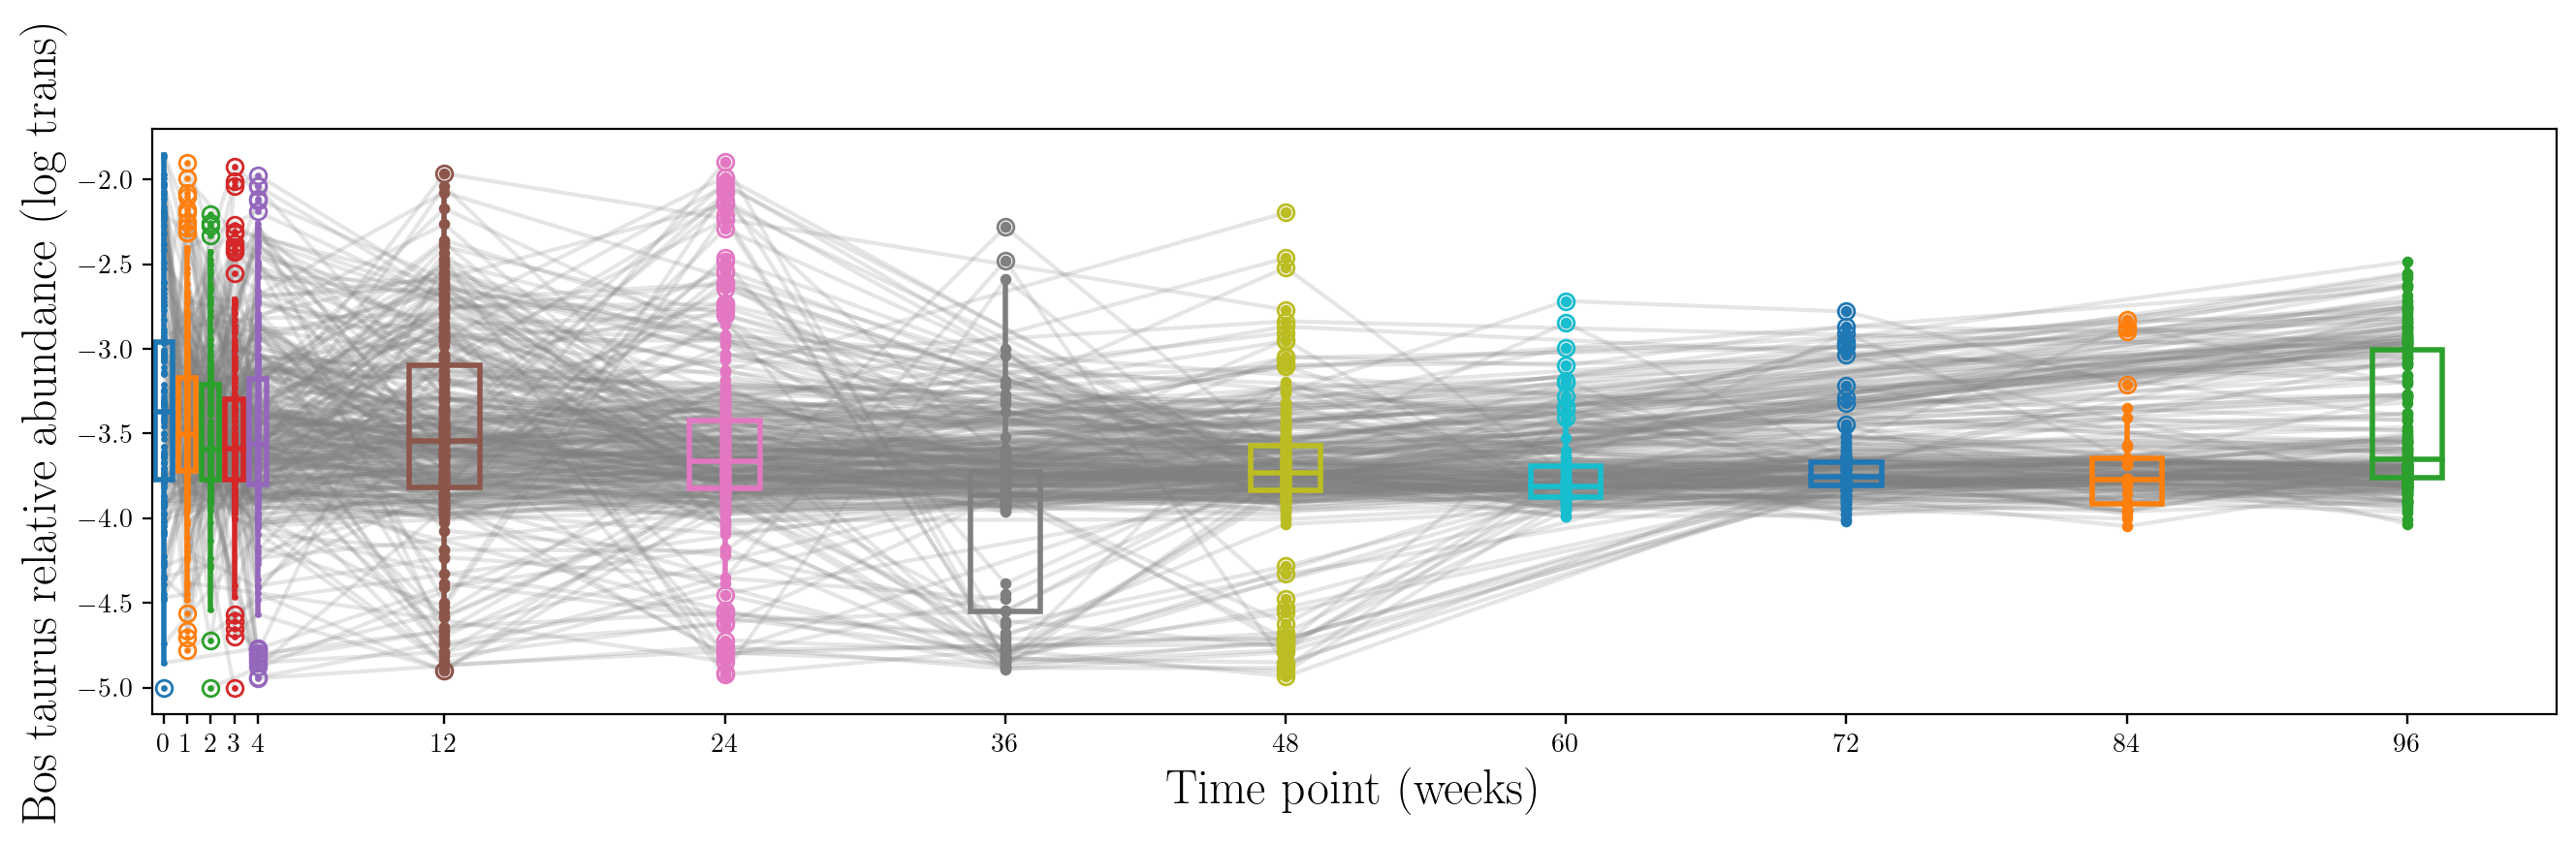

In [14]:
plot_index("Bos taurus relative abundance (log trans)")